### Linear SVM Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

# system version 
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.19.2
1.1.3
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col = ['petal_length','petal_width','species']
df.loc[:,col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [4]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
col = ['petal_length','petal_width']
X = df.loc[:, col]

In [6]:
species_to_num ={'setosa':0,
                'versicolor':1,
                'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

- **LinearSVC**
   -    similar to SVC with parameter kernel='linear',but implemented in terms of liblinear rather than libsvm,so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

- **SVC**
 - C- Support Vector Classification.
 The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [7]:
# C is small margin is high, C is large margin is small
C= 0.001
clf = svm.SVC(kernel='linear',C=C)
clf.fit(X,y)

SVC(C=0.001, kernel='linear')

In [8]:
clf.predict([[6,2]])

array([2], dtype=int64)

In [9]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                    np.arange(y_min, y_max,h))

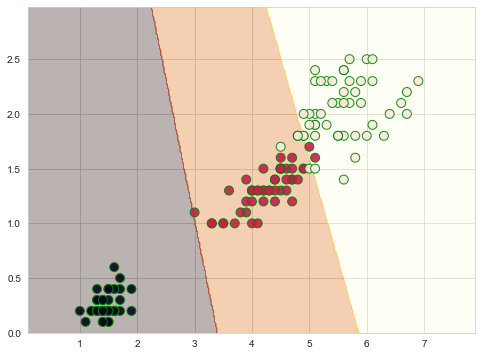

In [10]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3);
plt.scatter(X.values[:,0],X.values[:,1],c=y, s= 80,
           alpha=0.9,edgecolors='g');


### Linear SVM Implementation

In [11]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = df.loc[:,col]
species_to_num ={'setosa':0,
                'versicolor':1,
                'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                   train_size=0.8,
                                                   random_state=0)

#### Scale Feature (svm is sensitive to scaling)

In [12]:
sc_x =StandardScaler()
x_std_train = sc_x.fit_transform(x_train)

In [13]:
C = 1.0 #0.01
clf = svm.SVC(kernel='linear' , C=C)
clf.fit(x_std_train, y_train)

SVC(kernel='linear')

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score

#### Cross Validation within Train Dataset

In [15]:
res = cross_val_score(clf, x_std_train,y_train,cv=10,scoring='accuracy')
print("Averange Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Averange Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [16]:
y_train_pred = cross_val_predict(clf,x_std_train, y_train, cv=3)

In [17]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [18]:
print("precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(recall_score(y_train,y_train_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(f1_score(y_train,y_train_pred,average='weighted')))

precision Score: 	 0.9500
precision Score: 	 0.9500
precision Score: 	 0.9500


#### Cross Validation within Test Dataset

In [19]:
y_test_pred = cross_val_predict(clf,sc_x.transform(x_test), y_test, cv=3)

In [20]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [21]:
print("precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(recall_score(y_test, y_test_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(f1_score(y_test, y_test_pred,average='weighted')))

precision Score: 	 0.9422
precision Score: 	 0.9333
precision Score: 	 0.9290


### Polynomial kernel

In [22]:
C = 1.0
clf = svm.SVC(kernel='poly',degree=3, C=C, gamma='auto')
clf.fit(X,y)

SVC(gamma='auto', kernel='poly')

In [23]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                    np.arange(y_min, y_max,h))

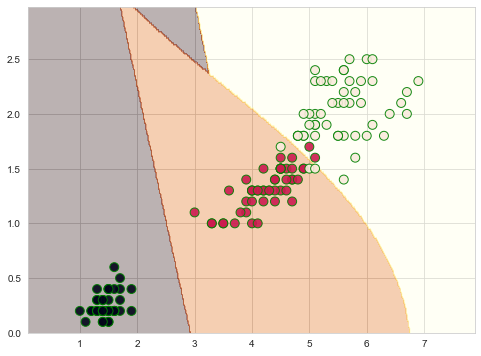

In [24]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3);
plt.scatter(X.values[:,0],X.values[:,1],c=y, s= 80,
           alpha=0.9,edgecolors='g');


#### Polynomial SVM Implementation

In [25]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length','petal_width']
col = df.loc[:,col]
species_to_num ={'setosa':0,
                'versicolor':1,
                'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                   train_size=0.8,
                                                   random_state=0)

### Scale Feature

In [26]:
sc_x =StandardScaler()
x_std_train = sc_x.fit_transform(x_train)

In [27]:
C = 1.0 #0.01
clf = svm.SVC(kernel='poly',degree= 10, C=C , gamma='auto')
clf.fit(x_std_train, y_train)

SVC(degree=10, gamma='auto', kernel='poly')

In [28]:
res = cross_val_score(clf, x_std_train,y_train,cv=10,scoring='accuracy')
print("Averange Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Averange Accuracy: 	 0.7833
Accuracy SD: 		 0.1404


#### #### Cross Validation within Train Dataset

In [29]:
y_train_pred = cross_val_predict(clf,x_std_train, y_train, cv=3)

In [30]:
confusion_matrix(y_train, y_train_pred)

array([[35,  0,  4],
       [ 0, 37,  0],
       [ 7, 18, 19]], dtype=int64)

In [31]:
print("precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(recall_score(y_train,y_train_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(f1_score(y_train,y_train_pred,average='weighted')))

precision Score: 	 0.7812
precision Score: 	 0.7583
precision Score: 	 0.7368


#### Cross Validation within Test Dataset

In [32]:
y_test_pred = cross_val_predict(clf,sc_x.transform(x_test), y_test, cv=3)

In [33]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  1],
       [ 0, 13,  0],
       [ 3,  3,  0]], dtype=int64)

In [34]:
print("precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(recall_score(y_test, y_test_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(f1_score(y_test, y_test_pred,average='weighted')))

precision Score: 	 0.6341
precision Score: 	 0.7667
precision Score: 	 0.6941


### Gaussian Radial Basis Function(rbf)

In [35]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length','petal_width']
col = df.loc[:,col]
species_to_num ={'setosa':0,
                'versicolor':1,
                'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                   train_size=0.8,
                                                   random_state=0)

#### Scale Features

In [36]:
sc_x =StandardScaler()
x_std_train = sc_x.fit_transform(x_train)

In [37]:
C = 1.0 #0.01
clf = svm.SVC(kernel='rbf', C=C , gamma=0.7)
clf.fit(x_std_train, y_train)

SVC(gamma=0.7)

#### Cross Validation within Train dataset

In [38]:
res = cross_val_score(clf, x_std_train,y_train,cv=10,scoring='accuracy')
print("Averange Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Averange Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [39]:
y_train_pred = cross_val_predict(clf,x_std_train, y_train, cv=3)

In [40]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [41]:
print("precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(recall_score(y_train,y_train_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(f1_score(y_train,y_train_pred,average='weighted')))

precision Score: 	 0.9586
precision Score: 	 0.9583
precision Score: 	 0.9584


In [42]:
y_test_pred = cross_val_predict(clf,sc_x.transform(x_test), y_test, cv=3)

In [43]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [44]:
print("precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(recall_score(y_test, y_test_pred,average='weighted')))
print("precision Score: \t {0:.4f}".format(f1_score(y_test, y_test_pred,average='weighted')))

precision Score: 	 0.9422
precision Score: 	 0.9333
precision Score: 	 0.9290


### Grid Search

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV

* we can improve this by scaling the features

In [47]:
pipeline = Pipeline([('clf',svm.SVC(kernel='rbf',C=1,gamma=0.1))])

In [48]:
params={'clf__C':(0.1,0.5,1,2,5,10,20),
        'clf__gamma':(0.001,0.01,0.1,0.25,0.5,0.75,1)}

In [49]:
svm_grid_rbf = GridSearchCV(pipeline,params, n_jobs=-1,
                            cv=3, verbose=1,scoring='accuracy')

In [50]:
svm_grid_rbf.fit(x_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [51]:
svm_grid_rbf.best_score_

0.9583333333333334

In [52]:
best = svm_grid_rbf.best_estimator_.get_params()

In [53]:
for k in sorted(params.keys()):
    print('\t{0}:\t {1:2f}'.format(k,best[k]))

	clf__C:	 0.500000
	clf__gamma:	 0.500000


In [54]:
y_test_pred = svm_grid_rbf.predict(x_test)

In [55]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [56]:
print("precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred,
                                                           average='weighted')))
print("precision Score: \t {0:.4f}".format(recall_score(y_test, y_test_pred,
                                                        average='weighted')))
print("precision Score: \t {0:.4f}".format(f1_score(y_test, y_test_pred,
                                                    average='weighted')))

precision Score: 	 1.0000
precision Score: 	 1.0000
precision Score: 	 1.0000


In [57]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                    np.arange(y_min, y_max,h))

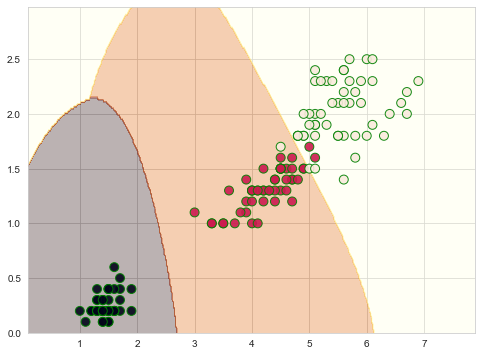

In [58]:
z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3);
plt.scatter(X.values[:,0],X.values[:,1],c=y, s= 80,
           alpha=0.9,edgecolors='g');
